**Image Segmentation Using Python**

Simplifying or changing the representation of an image into something more meaningful and easier to analyze. It is used in medical imaging, object detection, recognition and surveillance systems 

In [1]:
#importing computer vision library 
import cv2
#importing plotting library
import matplotlib.pyplot as plt
#importing data manipulation and modification library
import pandas as pd
#importing library for scientific computing with arrays
import numpy as np

Colour spaces are specific organizations of colours. They produce reproducible represetations of colour. The most commonly used is RGB- which represents a colour as a tuple of three elements, with each having a value between 0 and 255. Different colour spaces are used for different purposes. 

In [2]:
#creating a list containing all colour space conversions in cv2
col_sp_conv=[]
for i in dir(cv2):
    if i.startswith('COLOR_'):
        col_sp_conv.append(i)

In [3]:
#getting the length of types of colour space convertors 
print(len(col_sp_conv))

#getting a sample name of one colour space convertor
print(col_sp_conv[4])

346
COLOR_BAYER_BG2GRAY


In [4]:
#getting the image path
img_path='/Users/sumedhapooonia/Desktop/Pictures-of-Elk.jpg'

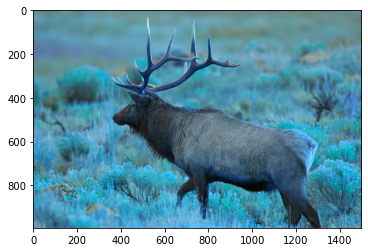

In [5]:
#cv library is reading image from path
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()

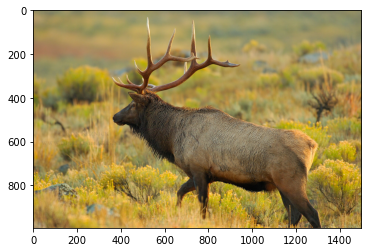

In [6]:
#as cv automatically reads image in BGR format, we change the format to RGB
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Visualising the colour pixels with the help of scatter plots 

In [7]:
#splitting the colours as an RGB tuple
r, g, b=cv2.split(img)

In [8]:
#importing libraries for visualisations 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [9]:
#normalizing colours as required in the plot parameters
col_pix=img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norma=colors.Normalize(vmin=-1.,vmax=1.)
norma.autoscale(col_pix)
col_pix = norma(col_pix).tolist()

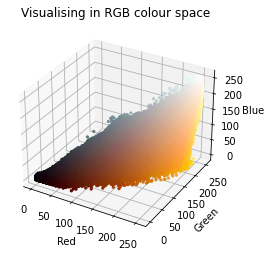

In [10]:
#setting up the plot
fig=plt.figure()
axis=fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=col_pix, marker='.')
plt.title('Visualising in RGB colour space')
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')
plt.show()

In [15]:
#reshaping the image into a 2D vector
_2D = img.reshape((-1,3))
#converting it to float datatype
_2D = np.float32(_2D)

In [16]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

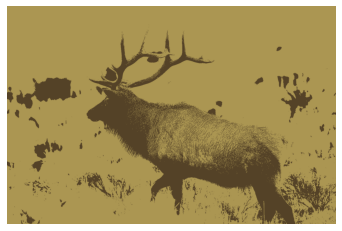

In [17]:
ret,label,center=cv2.kmeans(_2D,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)